# Geodatenanalyse 1
## Termin 9
### Funktionalität von *Pandas*


## Inhalt
- Kombinieren von Daten aus mehreren Tabellen (*merge* und *concat*)
- *Group by*: Split-apply-combine Pattern (*groupby*)
- Überblick über die Datums- und Zeitfunktionalität

In [1]:
# Importieren von Bibliotheken:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Style
plt.style.use('ggplot')

## Kombinieren von Daten aus mehreren Tabellen
Die beiden wichtigsten Funktionen zum kombinieren von Tabellen in Pandas sind:

- **concat()**: Aneinanderhängen von Tabellen entlang einer Achse (zeilen- oder spaltenweise)
- **merge()**: Zusammenfügen von Tabellen mittels einer gemeinsamen Kennung (ID-Spalte)

\
\
\
\
\
Für die nachfolgende Einführung wird der folgende Beispieldatensatz verwendet:\
\
*R Palmer penguins dataset for data exploration & visualization*

    Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer
    Archipelago (Antarctica) penguin data. R package version 0.1.0.
    https://allisonhorst.github.io/palmerpenguins/. doi:10.5281/zenodo.3960218.

Mehr Infos zum Datensatz unter:
https://allisonhorst.github.io/palmerpenguins/articles/intro.html

\
\
Diese Einführung basiert auf dem Pandas eigenen Tutorial zum Kombinieren von Tabellen:\
https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html \
Dort finden sich viele weitere Informationen und Inhalte.

### Aneinanderhängen von Tabellen
Wir haben in unserem Beispiel **3 separate Tabellen** mit Daten zu 3 Pinguinarten, die entlang des Palmer-Archipels nahe Palmer Station nisten, und möchten diese in einer einzigen Tabelle zusammenführen.

![PalmerPenguins](images\Palmer_penguins.png)

Artwork by @allison_horst

In [2]:
penguins_adelie = pd.read_excel("example_data\penguins.xlsx", sheet_name="Adelie")
penguins_adelie.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [3]:
penguins_chinstrap = pd.read_excel("example_data\penguins.xlsx", sheet_name="Chinstrap")
penguins_chinstrap.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Chinstrap,Dream,46.5,17.9,192,3500,Female
1,Chinstrap,Dream,50.0,19.5,196,3900,Male
2,Chinstrap,Dream,51.3,19.2,193,3650,Male


In [4]:
penguins_gentoo = pd.read_excel("example_data\penguins.xlsx", sheet_name="Gentoo")
penguins_gentoo.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,Female
1,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male
2,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female


### Die concat() Methode
Die Pandas <font color="red">concad()</font> Methode ermöglicht das zeilen- oder spaltenweise Aneinanderhängen von Tabellen, die eine ähnliche Struktur aufweisen.

![Concat](images\Concat.png)

In [5]:
# concat() verwendet standardmäßig axis= 0 (zeileweise)
penguins = pd.concat([penguins_adelie, penguins_chinstrap,penguins_gentoo], axis=0)

In [6]:
#Wieviele Arten finden sich in der neuen Tabelle?
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

### Der neue Datensatz im Überblick: 

In [7]:
print("Dimension der Adelie-Pinguintabelle: ",penguins_adelie.shape)
print("Dimension der Chinstrap-Pinguintabelle: ", penguins_chinstrap.shape)
print("Dimension der Gentoo-Pinguintabelle: ", penguins_gentoo.shape)
print("Dimension der aneinandergehängten Tabelle: ", penguins.shape)

Dimension der Adelie-Pinguintabelle:  (152, 7)
Dimension der Chinstrap-Pinguintabelle:  (68, 7)
Dimension der Gentoo-Pinguintabelle:  (124, 7)
Dimension der aneinandergehängten Tabelle:  (344, 7)


<AxesSubplot:xlabel='island', ylabel='Count'>

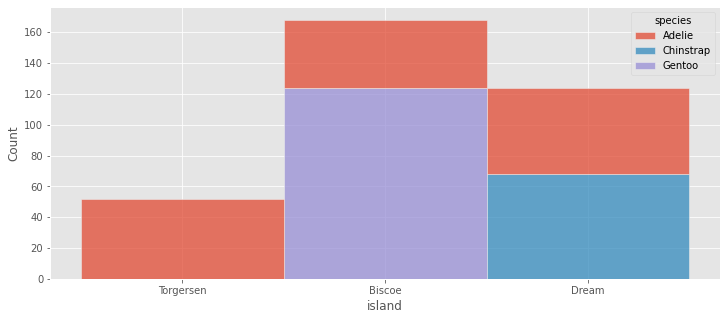

In [8]:
plt.figure(figsize=(12,5))
sns.histplot(x="island", hue="species", multiple="stack", data=penguins)

### Kombinieren von Tabellen mit einer gemeinsamen Kennung
Wir haben zusätzlich zu den Pinguindaten eine weitere Tabelle mit Informationen zur **geographischen Position der einzelnen Inseln**. Wir möchten beide Datensätze in einer gemeinsamen Tabelle zusammenführen.

In [9]:
penguins = pd.read_excel("example_data\penguins.xlsx", sheet_name="species")

#### Die drei Inseln

In [10]:
penguins.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

#### Der Insel-Datensatz

In [11]:
islands = pd.read_excel("example_data\PalmerArchipel_WGS84.xlsx")
islands

,island,latitude,longitude
0,Torgersen,-64.773100,-64.074100
1,Biscoe,-65.704167,-65.872778
2,Dream,-64.726800,-64.224800


### Gemeinsame Kennung
Mit der Pandas <font color="red">merge()</font> Methode können Tabelle anhand einer gemeinsamen Kennung (ID) zusammengeführt werden. In unserem Fall: 

    islands

In [12]:
penguins_new = pd.merge(penguins, islands, how="left", on="island")
penguins_new.head(8)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,latitude,longitude
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-64.7731,-64.0741
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-64.7731,-64.0741
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-64.7731,-64.0741
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,-64.7731,-64.0741
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-64.7731,-64.0741
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-64.7731,-64.0741
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,-64.7731,-64.0741
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,-64.7731,-64.0741


#### Alternativer Syntax

In [13]:
penguins_new_2 = penguins.merge(islands, how="left", on="island")
penguins_new_2.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,latitude,longitude
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-64.7731,-64.0741
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-64.7731,-64.0741


#### Hinweis
Mit der Option <font color="red">how="left"</font> wird sichergestellt, dass nur Inselnamen, die in der linken Tabelle (penguins) vorkommen, in der neuen Tabelle landen.

### Zusammenfassung:
 - Mit der Funktion <font color="red">concat()</font> können mehrere Tabellen sowohl spalten- als auch zeilenweise aneinandergehängt werden.
 - Für das datenbankähnliche Zusammenführen von Tabellen kann die <font color="red">merge()</font> Funtion verwendet werden.

### Ein genauerer Blick auf die Daten
Für einen allgemeinen Überblick zu den gängigen statistischen Kennwerten eines **DataFrame** hatten wir bereits die Pandas Methode <font color='red'>describe()</font> kennen gelernt.

In [14]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Für die meißten statistischen Kennwerte hat Pandas eine Methode die direkt auf Spalten mit numerischen Daten angewendet werden kann:

In [15]:
penguins["body_mass_g"].mean()

4201.754385964912

In [16]:
penguins[["bill_length_mm","bill_depth_mm"]].median()

bill_length_mm    44.45
bill_depth_mm     17.30
dtype: float64

#### Aber was, wenn ich einzelne Untergruppen, zum Beispiel die Pinguinart, unterscheiden möchte?

## Groupby
Mit "*group by*" beziehen wir uns auf einen Prozess, der einen oder mehrere der folgenden Schritte umfasst:
- **Split**: Aufteilen der Daten in Gruppen anhand von bestimmten Kriterien.
- **Apply**: Anwenden einer Funktion oder Methode auf jede der Gruppe.
- **Combine**: Kombinieren und Zu Ergebnisse zu einer Datenstruktur.

Ganz konkret findet dieses so genannte <font color="red">split-apply-combine</font> Pattern Anwendung bei der Berechnung individueller Statistiken für einzelne Kategorien oder Gruppen innerhalb eines **DataFrame**.

Mit der Pandas <font color="red">groupby()</font> Methode werden alle Schritte des Pattern automatisch kombiniert.

\
\
Quelle:
https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html

### Beispiel
- Was ist das <font color="green">mittlere</font> **<font color="peachpuff">Körpergewicht</font>** der einzelnen <font color="red">Pinguinarten</font>?

In [17]:
penguins.groupby("species")["body_mass_g"].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

![Grupby](images\Groupby.png)

Wir können auch nach mehreren Eigenschaften gleichzeitig sortieren:

In [18]:
penguins.groupby(["species","island"])["body_mass_g"].mean()

species    island   
Adelie     Biscoe       3709.659091
           Dream        3688.392857
           Torgersen    3706.372549
Chinstrap  Dream        3733.088235
Gentoo     Biscoe       5076.016260
Name: body_mass_g, dtype: float64

#### Hinweis
Der Funktionsumfang von <font color="red"> groupby()</font> ist enorm. Mehr dazu unter:\
https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

## Überblick über die Datums- und Zeitfunktionalität
Pandas hat eine Vielzahl von Funktionen zur einfachen Bearbeitung von Zeitreihendaten. Dazu gehört zum Beispiel:

- Analysieren von Zeitreiheninformationen aus verschiedenen Quellen und Formaten
- Resampling einer Zeitreihe in eine bestimmte Frequenz
- Berechnungen mit relativen und absoluten Zeitschritten
- Konvertieren von Datums- und Uhrzeitangaben mit Zeitzoneninformationen

\
Pandas nutzt dafür die NumPy Datentypen *datetime64* und *timedelta64*, und hat ein eigenes **datetime** Objekt.

\
\
Quelle:
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

### Pandas datetime 
#### Beispieldaten: Durchflussmessungen an der Dreisam

In [19]:
# https://udo.lubw.baden-wuerttemberg.de/public/
dreisam = pd.read_csv("example_data\Dreisam_Durchfluss_h.csv", sep=",")
dreisam.head(3)

,Messstellennummer,Stationsname,Gewaesser,Parameter,Datum/Uhrzeit,Wert,Einheit,Produkt
0,61239,Ebnet Dreisam,Dreisam,Q,01.01.2021 00:00,6.558,m3/s,Stundenmittelwert
1,61239,Ebnet Dreisam,Dreisam,Q,01.01.2021 01:00,6.552,m3/s,Stundenmittelwert
2,61239,Ebnet Dreisam,Dreisam,Q,01.01.2021 02:00,6.574,m3/s,Stundenmittelwert


In [20]:
# Die Datum/Uhrzeit - Spalte ist vom Datentyp "Objekt"
dreisam["Datum/Uhrzeit"].values

array(['01.01.2021 00:00', '01.01.2021 01:00', '01.01.2021 02:00', ...,
       '22.02.2021 20:00', '22.02.2021 21:00', '22.02.2021 22:00'],
      dtype=object)

Die Werte in <font color="red">Datum/Uhrzeit</font> des **DataFrame** sind als Zeichenketten gespeichert. Damit lassen sich aber noch keine **datetime** Operationen durchführen. Erst unter Verwendung der <font color="red">to_datetime</font> Funktion, wird aus der Zeichenabfolge, ein sogenanntes *datetime* Objekt vom Typ <font color="red">datetime64[ns]</font>:

In [21]:
dreisam["datetime"] = pd.to_datetime(dreisam["Datum/Uhrzeit"],dayfirst=True) # deutsches Datum
dreisam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Messstellennummer  1264 non-null   int64         
 1   Stationsname       1264 non-null   object        
 2   Gewaesser          1264 non-null   object        
 3   Parameter          1264 non-null   object        
 4   Datum/Uhrzeit      1264 non-null   object        
 5   Wert               1264 non-null   float64       
 6   Einheit            1264 non-null   object        
 7   Produkt            1264 non-null   object        
 8   datetime           1264 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 89.0+ KB


Tatsächlich lässt sich das **datetime** Objekt bereits beim Laden von Daten über die Pandas <font color="red">read_*</font> Funktionen festlegen:

In [22]:
dreisam_2 = pd.read_csv("example_data\Dreisam_Durchfluss_h.csv",sep=",", parse_dates=["Datum/Uhrzeit"])
dreisam_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Messstellennummer  1264 non-null   int64         
 1   Stationsname       1264 non-null   object        
 2   Gewaesser          1264 non-null   object        
 3   Parameter          1264 non-null   object        
 4   Datum/Uhrzeit      1264 non-null   datetime64[ns]
 5   Wert               1264 non-null   float64       
 6   Einheit            1264 non-null   object        
 7   Produkt            1264 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 79.1+ KB


### Analysieren der Daten mit datetime

#### Ausgabe eines bestimmten Zeitpunktes 

In [23]:
# Beginn und Ende der Zeitreihe
dreisam["datetime"].min(), dreisam["datetime"].max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-02-22 22:00:00'))

#### Ausgabe einer Zeitdauer

In [24]:
# Einfache Berechnungen: Dauer der Zeitreihe
dreisam["datetime"].max() - dreisam["datetime"].min()

Timedelta('52 days 22:00:00')

Pandas unterscheid hier zwischen zwei verschiedenen Konzepten und Klassen:

1. **Date times** als <font color="red">Timestamp</font> - Ein bestimmtes Datum oder eine konkrete Uhrzeit. Zum Beispiel mit dem Datentyp <font color="red">datetime64[ns]</font>. 
2. **Time deltas** als <font color="red">Timedelta</font> - Eine absolute Zeitdauer mit dem Datentyp <font color="red">timedelta64[ns]</font>.

### Weitere Datumsfunktionalitäten

Mit dem <font color="red">dt</font> Accessor (Attribut) können wir uns zum Beispiel nur den Monat aus dem **datetime** Objekt ausgeben lassen:

In [25]:
# Neue Spalte mit den Monaten
dreisam["Monat"] = dreisam["datetime"].dt.month
dreisam.head(3)

,Messstellennummer,Stationsname,Gewaesser,Parameter,Datum/Uhrzeit,Wert,Einheit,Produkt,datetime,Monat
0,61239,Ebnet Dreisam,Dreisam,Q,01.01.2021 00:00,6.558,m3/s,Stundenmittelwert,2021-01-01 00:00:00,1
1,61239,Ebnet Dreisam,Dreisam,Q,01.01.2021 01:00,6.552,m3/s,Stundenmittelwert,2021-01-01 01:00:00,1
2,61239,Ebnet Dreisam,Dreisam,Q,01.01.2021 02:00,6.574,m3/s,Stundenmittelwert,2021-01-01 02:00:00,1


In Kombination mit der <font color="red">groupby()</font> Funktion können wir auf einfache Art und Weise Mittelwerte für jeden Monat und Tag berechnen und plotten:

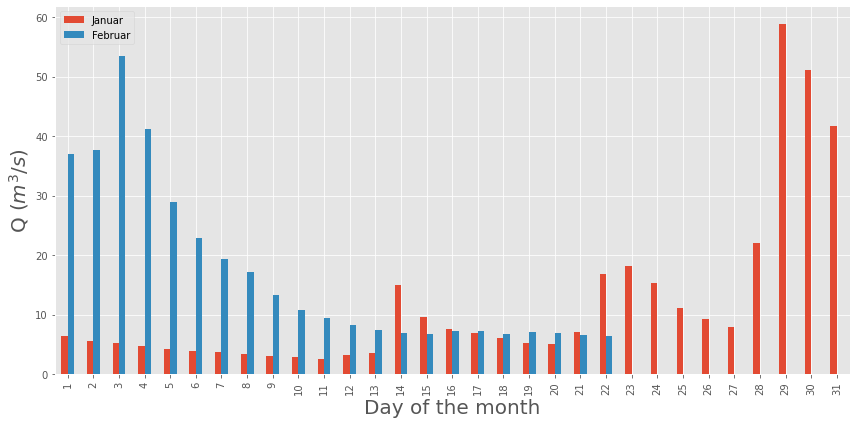

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))

# mittlerer Durchfluss nach Monat und Tag
df = dreisam.groupby(by=[dreisam["datetime"].dt.month,
                         dreisam["datetime"].dt.day])["Wert"].mean()

# Plotting
df.unstack(level=0).plot(kind='bar',ax=ax)
ax.set_xlabel("Day of the month",fontsize = 20)
ax.set_ylabel("Q $(m^3/s)$", fontsize = 20)
ax.legend(labels=["Januar","Februar"])
plt.tight_layout()

### Datetime als Index
Den größten Funktionsumfang bietet Pandas allerdings, wenn wir die Datum- und Uhrzeitinformationen aus dem **datetime** Objekt als <font color="red">Index</font> verwenden:

In [27]:
Q = dreisam.set_index("datetime")
Q.head(3)

,Messstellennummer,Stationsname,Gewaesser,Parameter,Datum/Uhrzeit,Wert,Einheit,Produkt,Monat
datetime,,,,,,,,,
2021-01-01 00:00:00,61239,Ebnet Dreisam,Dreisam,Q,01.01.2021 00:00,6.558,m3/s,Stundenmittelwert,1
2021-01-01 01:00:00,61239,Ebnet Dreisam,Dreisam,Q,01.01.2021 01:00,6.552,m3/s,Stundenmittelwert,1
2021-01-01 02:00:00,61239,Ebnet Dreisam,Dreisam,Q,01.01.2021 02:00,6.574,m3/s,Stundenmittelwert,1


In [28]:
Q.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1264 entries, 2021-01-01 00:00:00 to 2021-02-22 22:00:00
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Messstellennummer  1264 non-null   int64  
 1   Stationsname       1264 non-null   object 
 2   Gewaesser          1264 non-null   object 
 3   Parameter          1264 non-null   object 
 4   Datum/Uhrzeit      1264 non-null   object 
 5   Wert               1264 non-null   float64
 6   Einheit            1264 non-null   object 
 7   Produkt            1264 non-null   object 
 8   Monat              1264 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 98.8+ KB


#### Hinweis
In Pandas kann die <font color="red"> set_index()</font> Methode verwendet werden, um Spalten als Index zu verwenden.

### Indizieren einer Zeitreihe
Der **datetime** Index lässt sich wie gewohnt indizieren. Damit können wir uns für die Dreisam zum Beispiel nur die Durchflusswerte für den Januar anschauen:

Text(0, 0.5, 'Q $(m^3/s)$')

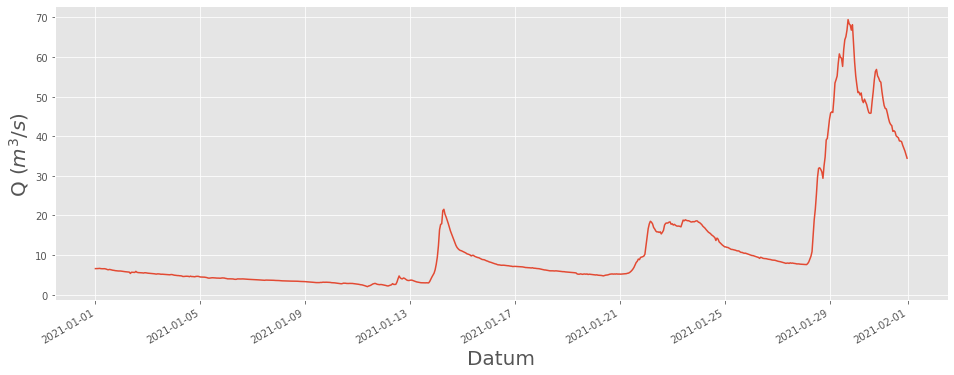

In [29]:
Q.loc["2021-01-01":"2021-01-31","Wert"].plot(figsize=(16,6))
# set axis labels
plt.xlabel("Datum", fontsize = 20)
plt.ylabel("Q $(m^3/s)$", fontsize = 20)

### Resampling einer Zeitreihe
Mit der <font color="red"> resample()</font> Methode können wir unseren Datensatz mit einer anderen Frequenz samplen und uns zum Beispiel den maximalen Durchfluss der Dreisam je Monat ausgeben lassen:

In [30]:
monthly_max = Q.resample("M").max()
monthly_max

,Messstellennummer,Stationsname,Gewaesser,Parameter,Datum/Uhrzeit,Wert,Einheit,Produkt,Monat
datetime,,,,,,,,,
2021-01-31,61239,Ebnet Dreisam,Dreisam,Q,31.01.2021 23:00,69.460,m3/s,Stundenmittelwert,1
2021-02-28,61239,Ebnet Dreisam,Dreisam,Q,22.02.2021 22:00,66.775,m3/s,Stundenmittelwert,2


Oder wir mitteln die Werte für jeden Tag um die Zeitreihe zu glätten:

Text(0, 0.5, 'Q $(m^3/s)$')

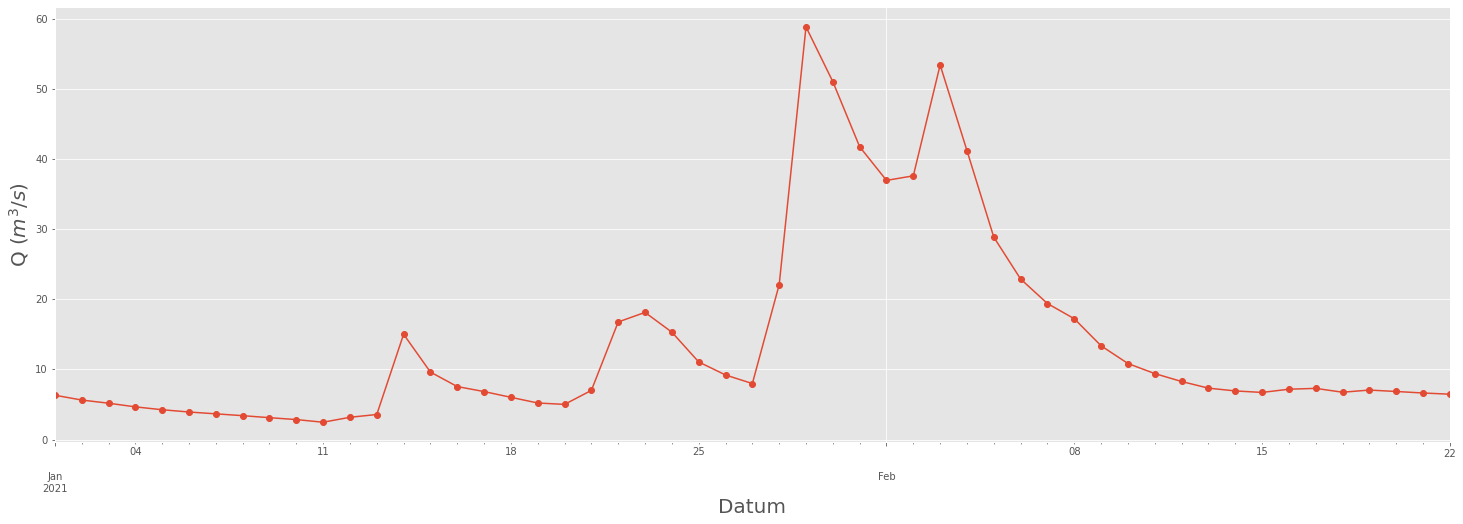

In [31]:
Q.loc[:,"Wert"].resample("D").mean().plot(style="-o", figsize=(25, 8))
plt.xlabel("Datum", fontsize = 20)
plt.ylabel("Q $(m^3/s)$", fontsize = 20)

### Zusammenfassung:
 - Gültige Zeichenfolgen die ein Datum representieren können mit der <font color="red">to_datetime</font> Funktion  oder direkt über die <font color="red">read_*</font> Funktionen in **datetime** Objekte konvertiert werden.
 - mit dem **datetime** Objekt können Berechnungen durchgeführt und über den <font color="red">dt</font>-Accessor auf datumsspezifische Eigenschaften zugegriffen werden.
 - Der **datetime** Index ermöglicht einfaches Selektieren und Resampling.

## ENDE